In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import math
import batman
# Disclaimer: Most of this is unoriginal and ripped directly from a random online tutorial.

In [6]:
data_planet = pd.read_excel("ep206103150.xlsx")

In [7]:
# data_planet.head()

# I will comment out a lot of unnecessary data.

In [8]:
#plt.plot(data_planet['time'],data_planet['flux'],label="Blue Led") # Plot a curve.
#plt.xlabel("Time")
#plt.ylabel("Flux")
#plt.title("A real graph")
#plt.show()

In [9]:
#plt.plot(data_planet['time'],data_planet['flux'])
#plt.xlim(2149, 2151)
#plt.xlabel("Time")
#plt.ylabel("Flux")
#plt.show()

In [10]:
#plt.plot(data_planet['time'],data_planet['flux']) 
#plt.xlim(2151, 2160)
#plt.xlabel("Time")
#plt.ylabel("Flux")
#plt.show()

In [11]:
#plt.plot(data_planet['time'],data_planet['flux']) 
#plt.xlim(2161, 2170)
#plt.xlabel("Time")
#plt.ylabel("Flux")
#plt.show()

In [12]:
#plt.plot(data_planet['time'],data_planet['flux']) 
#plt.xlim(2171, 2180)
#plt.xlabel("Time")
#plt.ylabel("Flux")
#plt.show()

In [13]:
#plt.plot(data_planet['time'],data_planet['flux']) 
#plt.xlim(2181, 2190)
#plt.xlabel("Time")
#plt.ylabel("Flux")
#plt.show()

In [14]:
#plt.plot(data_planet['time'],data_planet['flux']) 
#plt.xlim(2191, 2200)
#plt.xlabel("Time")
#plt.ylabel("Flux")
#plt.show()

In [15]:
#plt.plot(data_planet['time'],data_planet['flux']) 
#plt.xlim(2201, 2210)
#plt.xlabel("Time")
#plt.ylabel("Flux")
#plt.show()

In [16]:
#plt.plot(data_planet['time'],data_planet['flux']) 
#plt.xlim(2211, 2220)
#plt.xlabel("Time")
#plt.ylabel("Flux")
#plt.show()

In [17]:
#data_planet['newtime'] = np.linspace(0, (data_planet['time'] % 4.1591).max(), len(data_planet))
#data_planet['x1'] = (2149, 2151, 2913)

In [18]:
#plt.plot(data_planet['newtime'], data_planet['flux'])

In [19]:
# Define the number of functions to overlay
#num_functions = 13

# Define the range of x-values for the subplots
#x_ranges = [(2149, 2152), (2154, 2156), (2158, 2160), (2162, 2164), (2166, 2168),
           # (2174, 2177), (2183, 2185), (2187, 2189), (2191, 2194),
            #(2199, 2202), (2203, 2205), (2208, 2210), (2212, 2215)]

# Create subplots
#fig, axes = plt.subplots(nrows=num_functions, ncols=1, figsize=(8, 24), sharex=True)

# Plot each function on its corresponding subplot
#for i, ax in enumerate(axes):
   # x_range = x_ranges[i]
   # x_subset = data_planet['time'][(data_planet['time'] >= x_range[0]) & (data_planet['time'] <= x_range[1])]
   # y_subset = data_planet['flux'][(data_planet['time'] >= x_range[0]) & (data_planet['time'] <= x_range[1])]
   # ax.plot(x_subset, y_subset, label=f'Function {i + 1}')
   # ax.set_ylabel('Flux')
   # ax.legend()
   # ax.grid(True)

# Set the x-label for the last subplot
#axes[-1].set_xlabel('Time')

# Show the plot
#plt.show()

#This is commented out because it is not necessary.


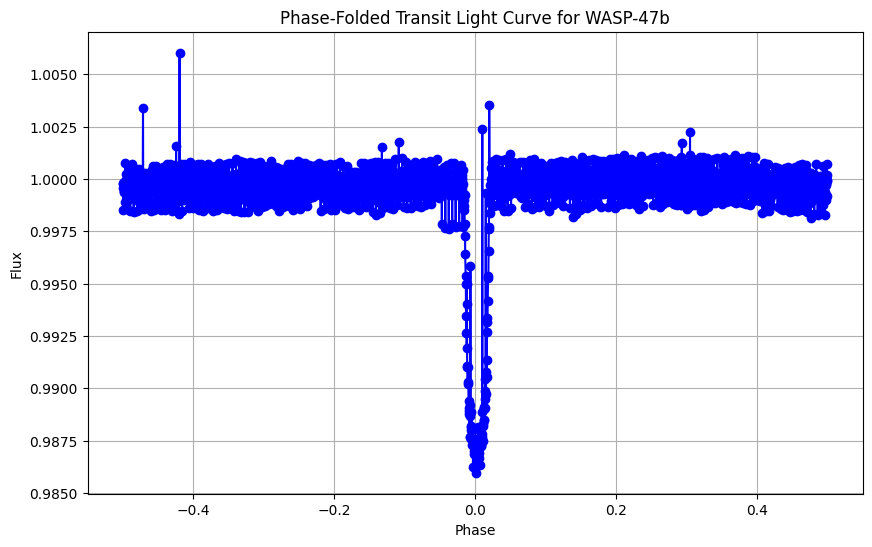

In [20]:
time = data_planet['time']
flux = data_planet['flux']
period = 4.1591

phase = ((time - time.min()) / period) % 1

# Adjusts phase to center the curve
phase_adjusted = phase - 0.845
phase_adjusted = np.where(phase_adjusted < -0.5, phase_adjusted + 1, phase_adjusted)
phase_adjusted = np.where(phase_adjusted > 0.5, phase_adjusted - 1, phase_adjusted)

# Sorts the data so the plot looks cleaner
sorted_indices = np.argsort(phase_adjusted)
sorted_phase = phase_adjusted[sorted_indices]
sorted_flux = flux[sorted_indices]

# Actual plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_phase, sorted_flux, marker='o', linestyle='-', color='b')
plt.xlabel('Phase')
plt.ylabel('Flux')
plt.title('Phase-Folded Transit Light Curve for WASP-47b')
plt.grid(True)
plt.show()


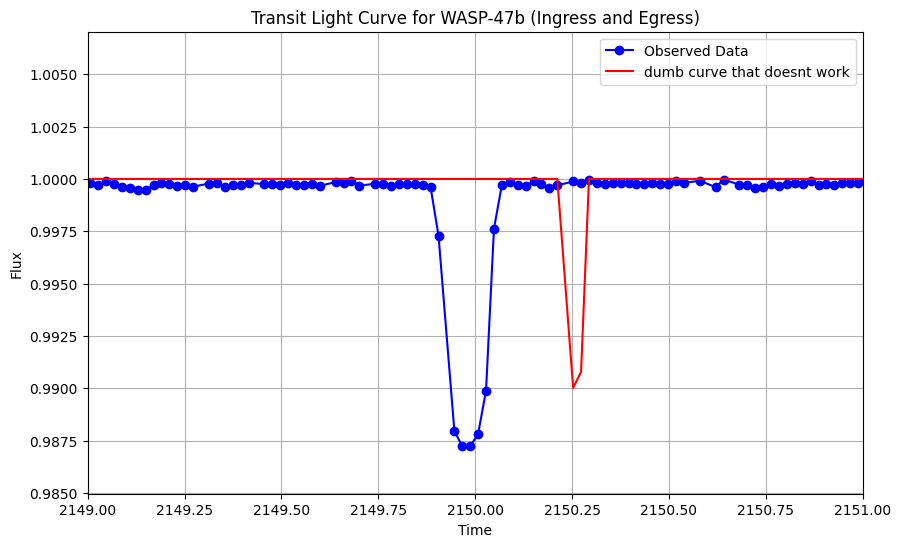

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import batman

# Load data
data_planet = pd.read_excel("ep206103150.xlsx")
time_data = np.array(data_planet['time'])
flux_data = np.array(data_planet['flux'])

# Define the transit model parameters
params = batman.TransitParams()
params.t0 = 0.0  # Transit center time
params.per = 4.1591  # Orbital period
params.rp = 0.1  # Planet-to-star radius ratio
params.a = 15  # Semi-major axis (in units of stellar radius)
params.inc = 87.  # Orbital inclination (in degrees)
params.ecc = 0.  # Eccentricity
params.w = 90.  # Argument of periastron (in degrees)
params.limb_dark = "quadratic"  # Limb darkening model
params.u = [0.1, 0.3]  # Limb darkening coefficients for quadratic model

# Initialize the BATMAN transit model
m = batman.TransitModel(params, time_data)

# Calculate the model light curve
flux_model = m.light_curve(params)

# Find the indices of the ingress and egress regions
ingress_start = np.argmin(flux_model)
ingress_end = np.argmax(flux_model)
egress_start = np.argmax(flux_model)
egress_end = np.argmin(flux_model)

# Plot the observed data and the model light curve for the selected region
plt.figure(figsize=(10, 6))
plt.plot(time_data, flux_data, marker='o', linestyle='-', color='b', label='Observed Data')
plt.plot(time_data, flux_model, color='r', label='dumb curve that doesnt work')
plt.fill_between(time_data[ingress_start:egress_end+1], flux_data[ingress_start:egress_end+1], flux_model[ingress_start:egress_end+1], color='gray', alpha=0.3)
plt.xlim(2149, 2151)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Transit Light Curve for WASP-47b (Ingress and Egress)')
plt.legend()
plt.grid(True)
plt.show()
